<a href="https://colab.research.google.com/github/villafue/Frequentist_Inference_Case_Study/blob/master/Frequentist_Inference_Case_Study_Part_B_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [43]:
import os
os.chdir('sample_data')
from IPython.display import display
%matplotlib inline
pd.set_option('display.notebook_repr_html', True)

In [20]:
from statsmodels.distributions.empirical_distribution import ECDF

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [5]:
medical.shape

(1338, 8)

In [38]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [6]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

## __A:__ This does not look like a normal distribution. There is also a lot of variance, and despite the spread, about 80% of the data fall below $20,000.

              The mean of the medical charges is:  13270.422265141257
The standard deviation of the medical charges is:  12110.011236693994


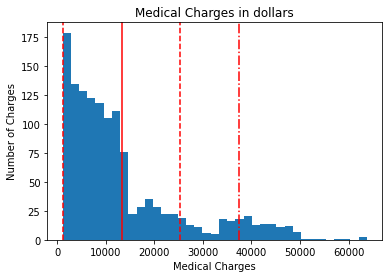

In [32]:
charges = medical.charges
bins = bins=37
_ = plt.hist(charges, bins=bins)
_ = plt.xlabel('Medical Charges')
_ = plt.ylabel('Number of Charges')
_ = plt.title('Medical Charges in dollars')
charges_mean = np.mean(charges)
charges_std = np.std(charges, ddof=1)
print('              The mean of the medical charges is: ', charges_mean)
print('The standard deviation of the medical charges is: ', charges_std)
_ = plt.axvline(charges_mean, color='r')
_ = plt.axvline(charges_mean + charges_std, color='r', linestyle='--')
_ = plt.axvline(charges_mean - charges_std, color='r', linestyle='--')
_ = plt.axvline(charges_mean + 2*charges_std, color='r', linestyle='-.')
# _ = plt.axvline(charges_mean - 2*charges_std, color='r', linestyle='-.')

In [13]:
charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

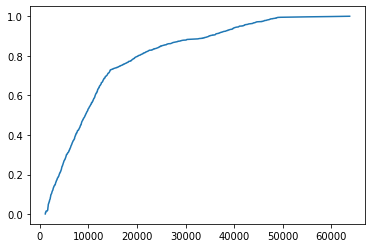

Approximately, 79.5964125560538 % of all the charges fall below $20,000


In [27]:
ecdf = ECDF(charges)
plt.plot(ecdf.x, ecdf.y)
plt.show()
print('Approximately,', ecdf(20000)*100,'% of all the charges fall below $20,000')

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ I would use a confidence interval. 1 sided confidence interval


__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

# __A:__ Confidence Interval For a Sample: 1-Sided (Lower Bound)

Step 1: Subtract 1 from your sample size. Ex. N - 1 = 49 This gives you degrees of freedom, which you’ll need in step 3.

Step 2: Subtract the confidence level from 1. (1 – .95 = .05)

Step 3: Look up your answers to step 1 and 2 in the t-distribution table. Ex. for 9 degrees of freedom (df) and α = 0.025, my result is 2.262. For 49, I will use t.ppf(p, df) which is t.ppf(0.975, 49) = 2.01. This is known as the T-Critical Value.

Step 4: Divide your sample standard deviation by the square root of your sample size. (4.195 / √(50) = 0.593) This is also known as the Standard Error. 

Step 5: Multiply step 3 by step 4. This is known as the Margin of Error.2.01 × 0.593 = 1.192

Step 6: Subtract Step 5 from the Sample Mean (Margin of Error - Mean) to find the Lower Bound Limit.

In [35]:
stan_err = charges_std / np.sqrt(len(charges))
t_crit_val = t.ppf(.95, len(charges) - 1)
marg_err_t = t_crit_val * stan_err
t_conf_int_low = charges_mean - marg_err_t
H1 = 12000
print('                              The Lower limit of the Confidence Interval is: ', t_conf_int_low)
print('Difference between 12k threshold and Lower Limit of the Confidence Interval: ', t_conf_int_low - H1)



                              The Lower limit of the Confidence Interval is:  12725.48718381623
Difference between 12k threshold and Lower Limit of the Confidence Interval:  725.4871838162308


__A:__ I would tell the hospital Administrator that I computed, with 95% confidence, that the lower-end of the range of the mean I computed is still over 700 dollars above the $12,000 limit. 

In [ ]:
# __A:__

In [ ]:
pulled standard deviation, s = variance, x-bar = mean

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ The Null Hypothesis is that the two groups are not charged differently whether or not they have insurance.

The Alternative Hypothesis is that the people with insurance are charged differently than those without it.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [51]:
med1 = medical.query('insuranceclaim == 1')
charges_1 = med1.charges
med0 = medical.query('insuranceclaim == 0')
charges_0 = med0.charges
print(   'Patients with insurance: ',charges_1.describe().T)
print('Patients without insurance: ',charges_0.describe().T)

Patients with insurance:  count      783.000000
mean     16423.928277
std      14045.928419
min       1131.506600
25%       5733.288925
50%      11538.421000
75%      23484.788875
max      63770.428010
Name: charges, dtype: float64
Patients without insurance:  count      555.000000
mean      8821.421892
std       6446.510127
min       1121.873900
25%       4445.337575
50%       6933.242250
75%      11424.211575
max      36910.608030
Name: charges, dtype: float64


# _A:_ Instructions on how to calculate t-statistic and corresponding p-value for 2 different sample populations.


In [100]:
h0 = charges_0
h1 = charges_1

# Step 1: Calculations for Pooled Variance (Sp):
h0var = np.var(h0)
h1var = np.var(h1)
SpNum1 = (((len(h0) - 1) * h0var ** 2) + ((len(h1) - 1) * h1var ** 2))
SpDen2 = len(h0) + len(h1) - 2
Sp = np.sqrt(SpNum1 / SpDen2)

# Step 2: Calculations for t-test statistic (t):
h0mean = np.mean(h0)
h1mean = np.mean(h1)
tnum1 = h0mean - h1mean
tden2 = (1 / len(h0)) + (1 / len(h1))
tden3 = Sp * np.sqrt(tden2)
t = tnum1 / tden3

# Step 3: Calculate Degrees of Freedom:
d_free = (len(h0) - 1) + (len(h1) - 1)
t

-0.0008949448957080473

In [93]:
# Step 4: Calculate t-Critical Value:
from scipy.stats import t
t_crit_val = t.ppf(.95, d_free)
t_crit_val

1.6459949688112576

In [98]:
from scipy.stats import ttest_ind
ttest_ind(h0,h1, equal_var=False)

Ttest_indResult(statistic=-13.298031957975649, pvalue=1.1105103216309125e-37)

\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test